# Capstone Python File

### First I donwload the necessary libraries. 

In [158]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
print("Downloads Completed")

Downloads Completed


### Donwloading & cleaning the dataset

First I download the library into the notebook.

In [159]:
df = pd.read_excel('/Users/martinrivera/Desktop/IBM DS Certificate/Assignments/Capstone_Car_Dataset_Clean.xlsx')

I proceed to clean & analyse the data. 

In [160]:
df.head(10)

price      brand    model  year  mileage   color       state NewUsed
0   6300     toyota      SUV  2008   274117   black  new jersey    Used
1   2899       ford    sedan  2011   190552  silver   tennessee    Used
2   5350      dodge      mpv  2018    39590  silver     georgia    Used
3  25000       ford    sedan  2014    64146    blue    virginia    Used
4  27700  chevrolet  vintage  2018     6654     red     florida    Used
5   5700      dodge      mpv  2018    45561   white       texas    Used
6   7300  chevrolet   pickup  2010   149050   black     georgia    Used
7  14600  chevrolet    sedan  2018     9371  silver     florida    Used
8   5250       ford      mpv  2017    63418   black       texas    Used
9  10400      dodge    coupe  2009   107856  orange     georgia    Used

In [161]:
df.dtypes

price       int64
brand      object
model      object
year        int64
mileage     int64
color      object
state      object
NewUsed    object
dtype: object

In [162]:
df.describe()

price         year       mileage
count   2403.000000  2403.000000  2.403000e+03
mean   18923.201415  2016.734915  5.195644e+04
std    12149.157309     3.417893  5.994723e+04
min        0.000000  1973.000000  0.000000e+00
25%    10400.000000  2016.000000  2.123550e+04
50%    16999.000000  2018.000000  3.525100e+04
75%    25800.000000  2019.000000  6.246400e+04
max    84900.000000  2020.000000  1.017936e+06

In [163]:
df['mileage'].max()

1017936

In [164]:
df['model'].unique()

array(['SUV', 'sedan', 'mpv', 'vintage', 'pickup', 'coupe', 'minivan',
       'sport', 'van', 'muscle', 'hatchback', 'electric', 'motorcylce',
       'Pickup', 'compact', 'passenger', 'bus', 'hybrid', 'suv', 'versa'],
      dtype=object)

In [165]:
df['model']= df['model'].replace(['versa'], ['sedan'])

In [166]:
df['model']= df['model'].replace(['Pickup'], ['pickup'])

In [167]:
df['model']= df['model'].replace(['SUV'], ['suv'])

In [168]:
df['model'].unique()

array(['suv', 'sedan', 'mpv', 'vintage', 'pickup', 'coupe', 'minivan',
       'sport', 'van', 'muscle', 'hatchback', 'electric', 'motorcylce',
       'compact', 'passenger', 'bus', 'hybrid'], dtype=object)

In [169]:
df.dtypes

price       int64
brand      object
model      object
year        int64
mileage     int64
color      object
state      object
NewUsed    object
dtype: object

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

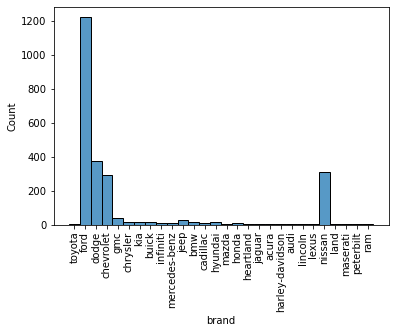

In [170]:
sn.histplot(data= df['brand'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

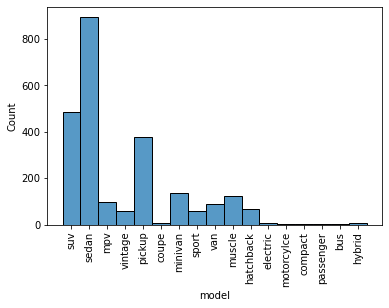

In [171]:
sn.histplot(data= df['model'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

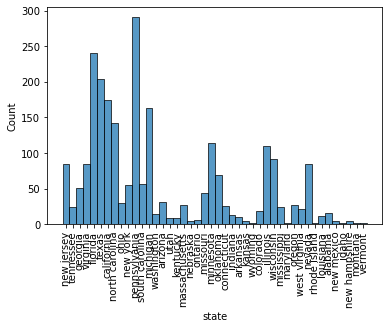

In [172]:
sn.histplot(data= df['state'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

<AxesSubplot:xlabel='year', ylabel='Count'>

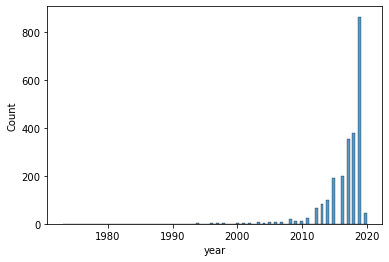

In [173]:
sn.histplot(data= df['year'])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

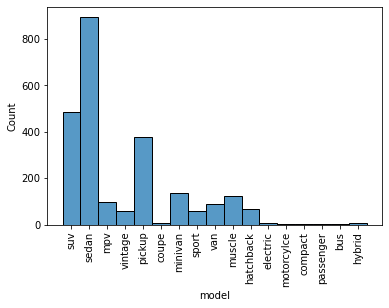

In [174]:
sn.histplot(data= df['model'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

<AxesSubplot:xlabel='mileage', ylabel='Count'>

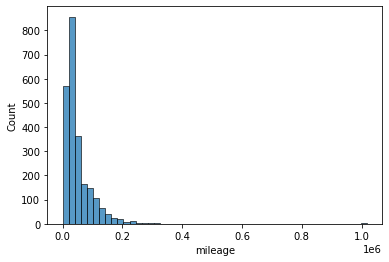

In [175]:
sn.histplot(data= df['mileage'], bins= 50)

<AxesSubplot:xlabel='NewUsed', ylabel='Count'>

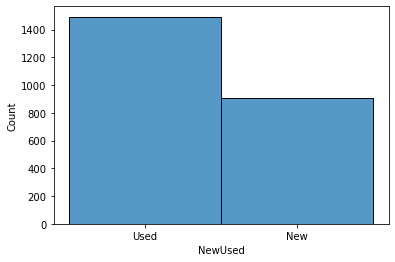

In [186]:
sn.histplot(data= df['NewUsed'], bins= 50)

<AxesSubplot:xlabel='price', ylabel='Count'>

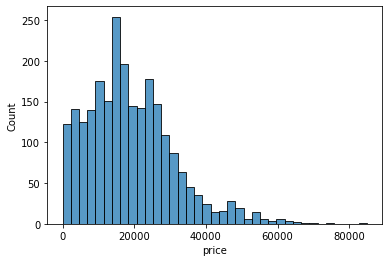

In [178]:
sn.histplot(df['price'])

From the graphs above and the statistical analysis I remove the outliers (which are identified in the report) from the dataset and load the new, clean, dataset. 

In [23]:
df2 = pd.read_excel('/Users/martinrivera/Desktop/IBM DS Certificate/Assignments/Capstone_Car_Dataset_Clean2.xlsx')

In [24]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [25]:
df2.head()

price      brand         model  year  mileage   color       state NewUsed
0   6300     toyota       cruiser  2008   274117   black  new jersey    Used
1   2899       ford            se  2011   190552  silver   tennessee    Used
2   5350      dodge           mpv  2018    39590  silver     georgia    Used
3  25000       ford          door  2014    64146    blue    virginia    Used
4  27700  chevrolet  model - 1500  2018     6654     red     florida    Used

I make bivariate graphs with the clean data to further understand the dataset. 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

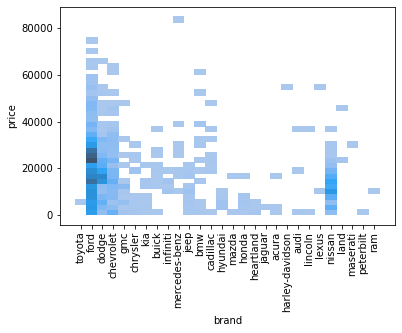

In [182]:
sn.histplot(data= df2, x= 'brand', y= 'price')
plt.xticks(rotation=90)

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020.,
        2025.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

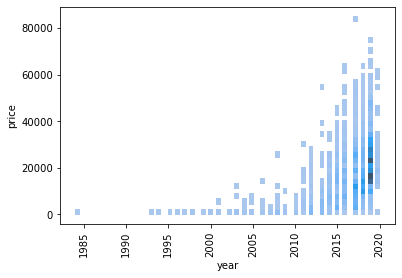

In [183]:
sn.histplot(data= df2, x= 'year', y= 'price')
plt.xticks(rotation=90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

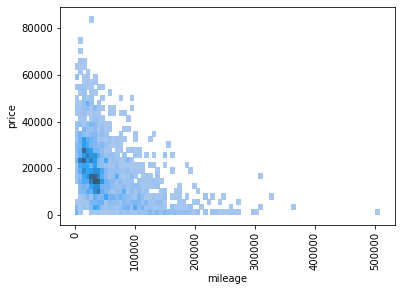

In [184]:
sn.histplot(data= df2, x= 'mileage', y= 'price')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

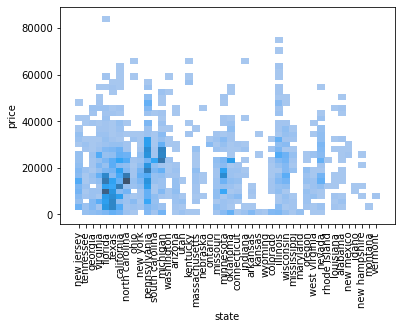

In [185]:
sn.histplot(data= df2, x= 'state', y= 'price')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

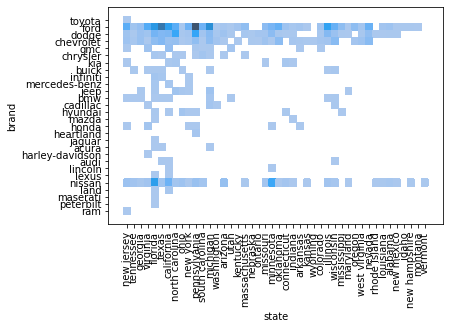

In [190]:
sn.histplot(data= df2, x= 'state', y= 'brand')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

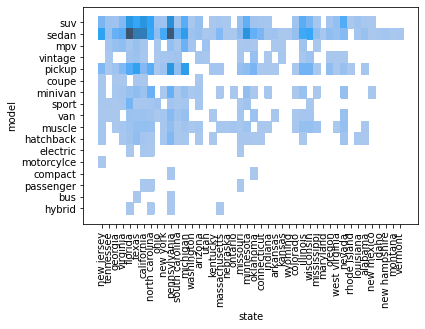

In [191]:
sn.histplot(data= df, x= 'state', y= 'model')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

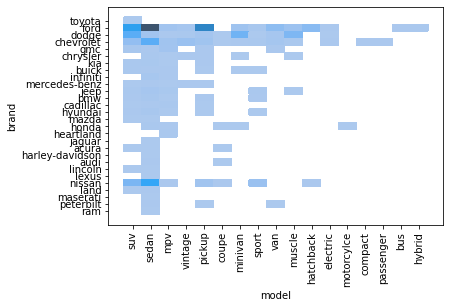

In [192]:
sn.histplot(data= df, x= 'model', y= 'brand')
plt.xticks(rotation=90)

I transform the object variables NewUsed, State and Brand into string characers in order to observe correlations. 

In [193]:
df2['brand']= df2['brand'].replace(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram'], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
                                         '11', '12', '13', '14', '15', '16', '17', '18',
                                         '19', '20', '21', '22', '23', '24', '25', '26', 
                                         '27', '28'])

In [194]:
df2['state']= df2['state'].replace(['new jersey', 'tennessee', 'georgia', 'virginia', 'florida',
       'texas', 'california', 'north carolina', 'ohio', 'new york',
       'pennsylvania', 'south carolina', 'michigan', 'washington',
       'arizona', 'utah', 'kentucky', 'massachusetts', 'nebraska',
       'ontario', 'missouri', 'minnesota', 'oklahoma', 'connecticut',
       'indiana', 'arkansas', 'kansas', 'wyoming', 'colorado', 'illinois',
       'wisconsin', 'mississippi', 'maryland', 'oregon', 'west virginia',
       'nevada', 'rhode island', 'louisiana', 'alabama', 'new mexico',
       'idaho', 'new hampshire', 'montana', 'vermont'], ['1', '2', '3', '4', '5', '6', '7',
                                                         '8', '9', '10', '11', '12', '13', 
                                                         '14', '15', '16', '17', '18', '19',
                                                         '20', '21', '22', '23', '24', '25',
                                                         '26', '27', '28', '29', '30', '31',
                                                         '32', '33', '34', '35', '36', '37', 
                                                         '38', '39', '40', '41', '42', '43', '44'])

In [195]:
df2['NewUsed']= df2['NewUsed'].replace(['New', 'Used'], ['1', '0'])

In [196]:
df2['NewUsed']= df2['NewUsed'].astype(int)

In [197]:
df2['state']= df2['state'].astype(int)
df2['state']= df2['state'].astype(int)

In [198]:
corrMatrix = df2.corr()

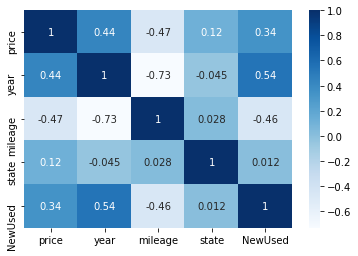

In [199]:
sn.heatmap(corrMatrix, annot=True, cmap= "Blues")
plt.show()

In [200]:
df2.head()

price brand         model  year  mileage   color  state  NewUsed
0   6300     1       cruiser  2008   274117   black      1        0
1   2899     2            se  2011   190552  silver      2        0
2   5350     3           mpv  2018    39590  silver      3        0
3  25000     2          door  2014    64146    blue      4        0
4  27700     4  model - 1500  2018     6654     red      5        0

In [201]:
df2.dtypes

price       int64
brand      object
model      object
year        int64
mileage     int64
color      object
state       int64
NewUsed     int64
dtype: object

In [202]:
df2.describe()

price         year        mileage        state      NewUsed
count   2494.000000  2494.000000    2494.000000  2494.000000  2494.000000
mean   18791.463913  2016.740978   50820.259423    14.147554     0.376905
std    12105.610040     3.324457   46890.268583    10.384229     0.484708
min        0.000000  1984.000000       0.000000     1.000000     0.000000
25%    10300.000000  2016.000000   21405.250000     6.000000     0.000000
50%    16900.000000  2018.000000   35317.500000    11.000000     0.000000
75%    25577.750000  2019.000000   63198.500000    22.000000     1.000000
max    84900.000000  2020.000000  507985.000000    44.000000     1.000000

### Predictive Models. 

First, I download the required packages, and the dataset with the Target Value. 

In [98]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import pandas as pd     
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import preprocessing
from sklearn import utils
from sklearn.neural_network import MLPRegressor
from sklearn import tree
import graphviz
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
from sklearn.linear_model import LogisticRegression

In [23]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                  |                  failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - alabaster -> python[version='>=2.7,<2.8.0a0|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.5,<3.6.0a0']
  - anaconda-navigator==2.0.3 -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0']
  - anaconda==2020.11 -> python[version='3.7.9|3.8.5',build='h26836e1_0|h26836e1_1']
  - argon2-cffi -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0']
  - attrs -> p

pep8 -> python[version='>=3.9,<3.10.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
pillow -> libtiff[version='>=4.1.0,<5.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
pandas -> python[version='>=3.9,<3.10.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
cryptography -> python[version='>=3.9,<3.10.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
numpy -> python[version='>=3.8,<3.9.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
nbconvert -> python[version='>=3.8,<3.9.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
pycurl -> python[version='>=3.9,<3.10.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
pywavelets -> python[version='>=3.9,<3.10.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
python.app -> python[version='>=3.7,<3.8.0a0'] -> xz[version='>=5.2.3,<6.0a0|>=5.2.4,<6.0a0|>=5.2.5,<6.0a0']
boto -> python[version='>=3.9,<3.10

argon2-cffi -> cffi[version='>=1.0.0']
anaconda==2020.11 -> argon2-cffi==20.1.0=py38haf1e3a3_1 -> cffi[version='!=1.11.3,>=1.8|>=1.0.0|>=1.11.5']
conda-content-trust -> cryptography -> cffi[version='!=1.11.3,>=1.8|>=1.12|>=1.8|>=1.7']
pyopenssl -> cryptography[version='>=2.8'] -> cffi[version='!=1.11.3,>=1.8|>=1.12|>=1.8|>=1.7']
cryptography -> cffi[version='!=1.11.3,>=1.8|>=1.12|>=1.8|>=1.7']
gevent -> cffi[version='>=1.11.5|>=1.3.0']
urllib3 -> brotlipy[version='>=0.6.0'] -> cffi[version='!=1.11.3,>=1.8|>=1.0.0|>=1.12|>=1.8|>=1.7']
anaconda==2020.11 -> cffi==1.14.3[build='py38hed5b41f_0|py37hed5b41f_0']

Package parso conflicts for:
anaconda==2020.11 -> jedi==0.17.1=py38_0 -> parso[version='0.7.0.*|>=0.7.0,<0.8.0']
jedi -> parso[version='0.1.0|>=0.1.0,<0.2|>=0.2.0|>=0.3.0|>=0.5.0|>=0.5.2|>=0.7.0|>=0.7.0,<0.8.0|>=0.8.0,<0.9.0']
spyder -> parso[version='0.5.2.*|0.7.0.*']
anaconda==2020.11 -> parso==0.7.0=py_0
python-language-server -> jedi[version='>=0.17.2,<0.18.0a0'] -> parso[version


Note: you may need to restart the kernel to use updated packages.


In [106]:
df_tar = pd.read_excel('/Users/martinrivera/Desktop/IBM DS Certificate/Assignments/Capstone_Car_Dataset_Target.xlsx')

In [85]:
df_tar.head()

price      brand    model  year  mileage   color       state NewUsed  \
0   6300     toyota      SUV  2008   274117   black  new jersey    Used   
1   2899       ford    sedan  2011   190552  silver   tennessee    Used   
2   5350      dodge      mpv  2018    39590  silver     georgia    Used   
3  25000       ford    sedan  2014    64146    blue    virginia    Used   
4  27700  chevrolet  vintage  2018     6654     red     florida    Used   

   Target  
0       0  
1       0  
2       0  
3       0  
4       1

In [86]:
df_tar['Target'].dtype

dtype('int64')

#### Choosing a Model

First we use label encoder to transform the variables type string to float in order to do the modeling.

In [107]:
le = LabelEncoder()
df_tar["brand"] = le.fit_transform(df_tar["brand"]).astype(int)
df_tar["model"] = le.fit_transform(df_tar["model"]).astype(int)
df_tar["color"] = le.fit_transform(df_tar["color"]).astype(int)
df_tar["state"] = le.fit_transform(df_tar["state"]).astype(int)
df_tar["NewUsed"] = le.fit_transform(df_tar["NewUsed"]).astype(int)
df_tar["Target"] = le.fit_transform(df_tar["Target"]).astype(int)

In [88]:
df_tar.head()

price  brand  model  year  mileage  color  state  NewUsed  Target
0   6300     27      1  2008   274117      2     24        1       0
1   2899      8     16  2011   190552     39     35        1       0
2   5350      7     12  2018    39590     39      7        1       0
3  25000      8     16  2014    64146      4     39        1       0
4  27700      5     20  2018     6654     34      6        1       1

In [56]:
df_tar.shape

(2494, 9)

In [57]:
df_tar.dtypes

price      int64
brand      int64
model      int64
year       int64
mileage    int64
color      int64
state      int64
NewUsed    int64
Target     int64
dtype: object

Nowe we set up X, and y, to make the models previous to making predictions; in order to compare their R^2. 

In [108]:
X = np.asarray(df_tar[['price', 'brand', 'model', 'year', 'mileage', 'color', 'state', 'NewUsed']])
y = np.asarray(df_tar['Target'])

In [104]:
X.shape, y.shape

((2494, 8), (2494,))

#### Regressions

In [109]:
#Linear Regression
reg = LinearRegression().fit(X, y)

In [61]:
reg.score(X, y)

0.2568838606636279

In [62]:
log_reg = LogisticRegression(random_state=0).fit(X, y)
log_reg.score(X, y)

0.776663993584603

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
p_reg= pol_reg.fit(X_poly, y)
p_reg.score(X_poly, y)

0.7266910396498841

In [110]:
#ElasticNet
X, y = make_regression(n_features=2, random_state=0)
elasticr = ElasticNet(random_state=0)
model_fit= elasticr.fit(X, y)
print("R2:", elasticr.score(X, y))

R2: 0.8904453086976037


Given that the model that explains the most variance is the elastic net regression. I procede to sleect it as the chossen model, find the best alpha, make the prediction model, and plot it. 

In [111]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(X,y)   
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:1.00, MSE:0.00, RMSE:0.01
Alpha:0.0010, R2:1.00, MSE:0.00, RMSE:0.05
Alpha:0.0100, R2:1.00, MSE:0.25, RMSE:0.50
Alpha:0.1000, R2:1.00, MSE:22.90, RMSE:4.79
Alpha:0.3000, R2:0.98, MSE:172.58, RMSE:13.14
Alpha:0.5000, R2:0.96, MSE:407.31, RMSE:20.18
Alpha:0.7000, R2:0.93, MSE:686.71, RMSE:26.21
Alpha:1.0000, R2:0.89, MSE:1139.88, RMSE:33.76


In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)

In [113]:
#Elastic Net Prediction Model
elastic=ElasticNet(alpha=0.7).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.935, MSE:602.54, RMSE:24.55


In [97]:
#Data
df_tar = pd.read_excel('/Users/martinrivera/Desktop/IBM DS Certificate/Assignments/Capstone_Car_Dataset_Target.xlsx')

X = np.asarray(df_tar[['price', 'brand', 'model', 'year', 'mileage', 'color', 'state', 'NewUsed']])
y = np.asarray(df_tar['Target'])

#Encoding
le = LabelEncoder()
df_tar["brand"] = le.fit_transform(df_tar["brand"]).astype(int)
df_tar["model"] = le.fit_transform(df_tar["model"]).astype(int)
df_tar["color"] = le.fit_transform(df_tar["color"]).astype(int)
df_tar["state"] = le.fit_transform(df_tar["state"]).astype(int)
df_tar["NewUsed"] = le.fit_transform(df_tar["NewUsed"]).astype(int)
df_tar["Target"] = le.fit_transform(df_tar["Target"]).astype(int)


In [94]:
#Train/Test
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)

#Elastic Net Prediction Model
elastic=ElasticNet(alpha=0.7).fit(xtrain, ytrain)

#Parameters
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,df_tar[['price', 'brand', 'model', 'year', 'mileage', 'color', 'state', 'NewUsed']]):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'price': 1.3485472311184638e-05,
 'brand': -0.0007287524708075849,
 'model': 0.0,
 'year': 0.0,
 'mileage': -1.94737104571889e-06,
 'color': 0.0015631349032631807,
 'state': 3.914941449071933e-05,
 'NewUsed': -0.0}

#### Logistic Regression

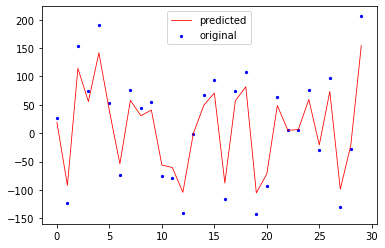

In [114]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

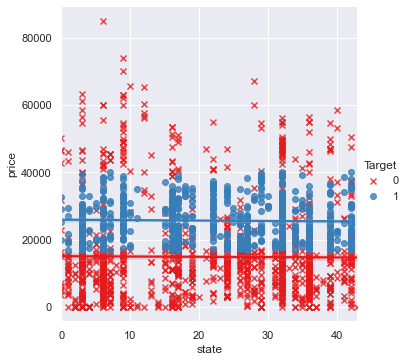

In [241]:
sns.lmplot(x="state", y="price", hue="Target", data=df_tar,
           markers=["x", "o"], palette="Set1");

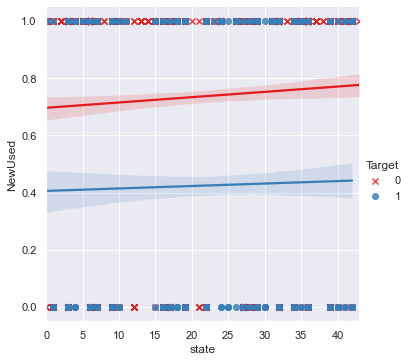

In [242]:
sns.lmplot(x="state", y="NewUsed", hue="Target", data=df_tar,
           markers=["x", "o"], palette="Set1");

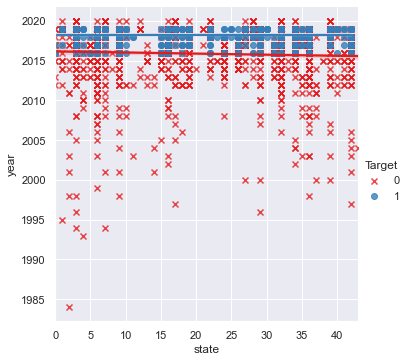

In [237]:
sns.lmplot(x="state", y="year", hue="Target", data=df_tar,
           markers=["x", "o"], palette="Set1");

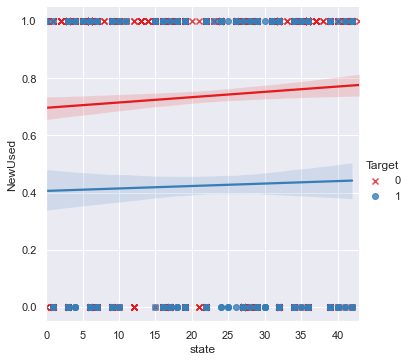

In [240]:
sns.lmplot(x="state", y="NewUsed", hue="Target", data=df_tar,
           markers=["x", "o"], palette="Set1");

#### Tree

In [148]:
Xt = df_tar[['price', 'brand', 'model', 'year', 'mileage', 'color', 'state', 'NewUsed']]
yt = df_tar['Target']

In [167]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

[Text(183.08242694805196, 209.6742857142857, 'X[1] <= -0.034\nmse = 10404.686\nsamples = 100\nvalue = 4.079'),
 Text(89.24829545454546, 194.14285714285714, 'X[1] <= -0.504\nmse = 2599.885\nsamples = 51\nvalue = -76.329'),
 Text(31.3875, 178.61142857142858, 'X[1] <= -1.304\nmse = 1601.867\nsamples = 37\nvalue = -97.414'),
 Text(5.797402597402598, 163.07999999999998, 'X[1] <= -2.13\nmse = 1387.366\nsamples = 6\nvalue = -151.511'),
 Text(2.898701298701299, 147.54857142857142, 'mse = 0.0\nsamples = 1\nvalue = -226.486'),
 Text(8.696103896103896, 147.54857142857142, 'X[1] <= -1.668\nmse = 315.72\nsamples = 5\nvalue = -136.515'),
 Text(5.797402597402598, 132.01714285714286, 'mse = 0.0\nsamples = 1\nvalue = -107.141'),
 Text(11.594805194805195, 132.01714285714286, 'X[1] <= -1.553\nmse = 125.005\nsamples = 4\nvalue = -143.859'),
 Text(5.797402597402598, 116.48571428571428, 'X[0] <= 0.125\nmse = 82.512\nsamples = 2\nvalue = -152.378'),
 Text(2.898701298701299, 100.9542857142857, 'mse = 0.0\nsam

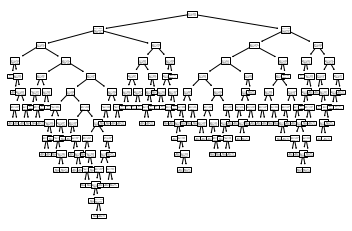

In [168]:
tree.plot_tree(clf) 

Seeing that the tree, with a depth of 13 levels, is too large to analize I procede to prune it with by implemening a max depth of 5 levels.  

In [171]:
clf1 = tree.DecisionTreeRegressor(max_depth= 5)
clf1 = clf1.fit(X, y)

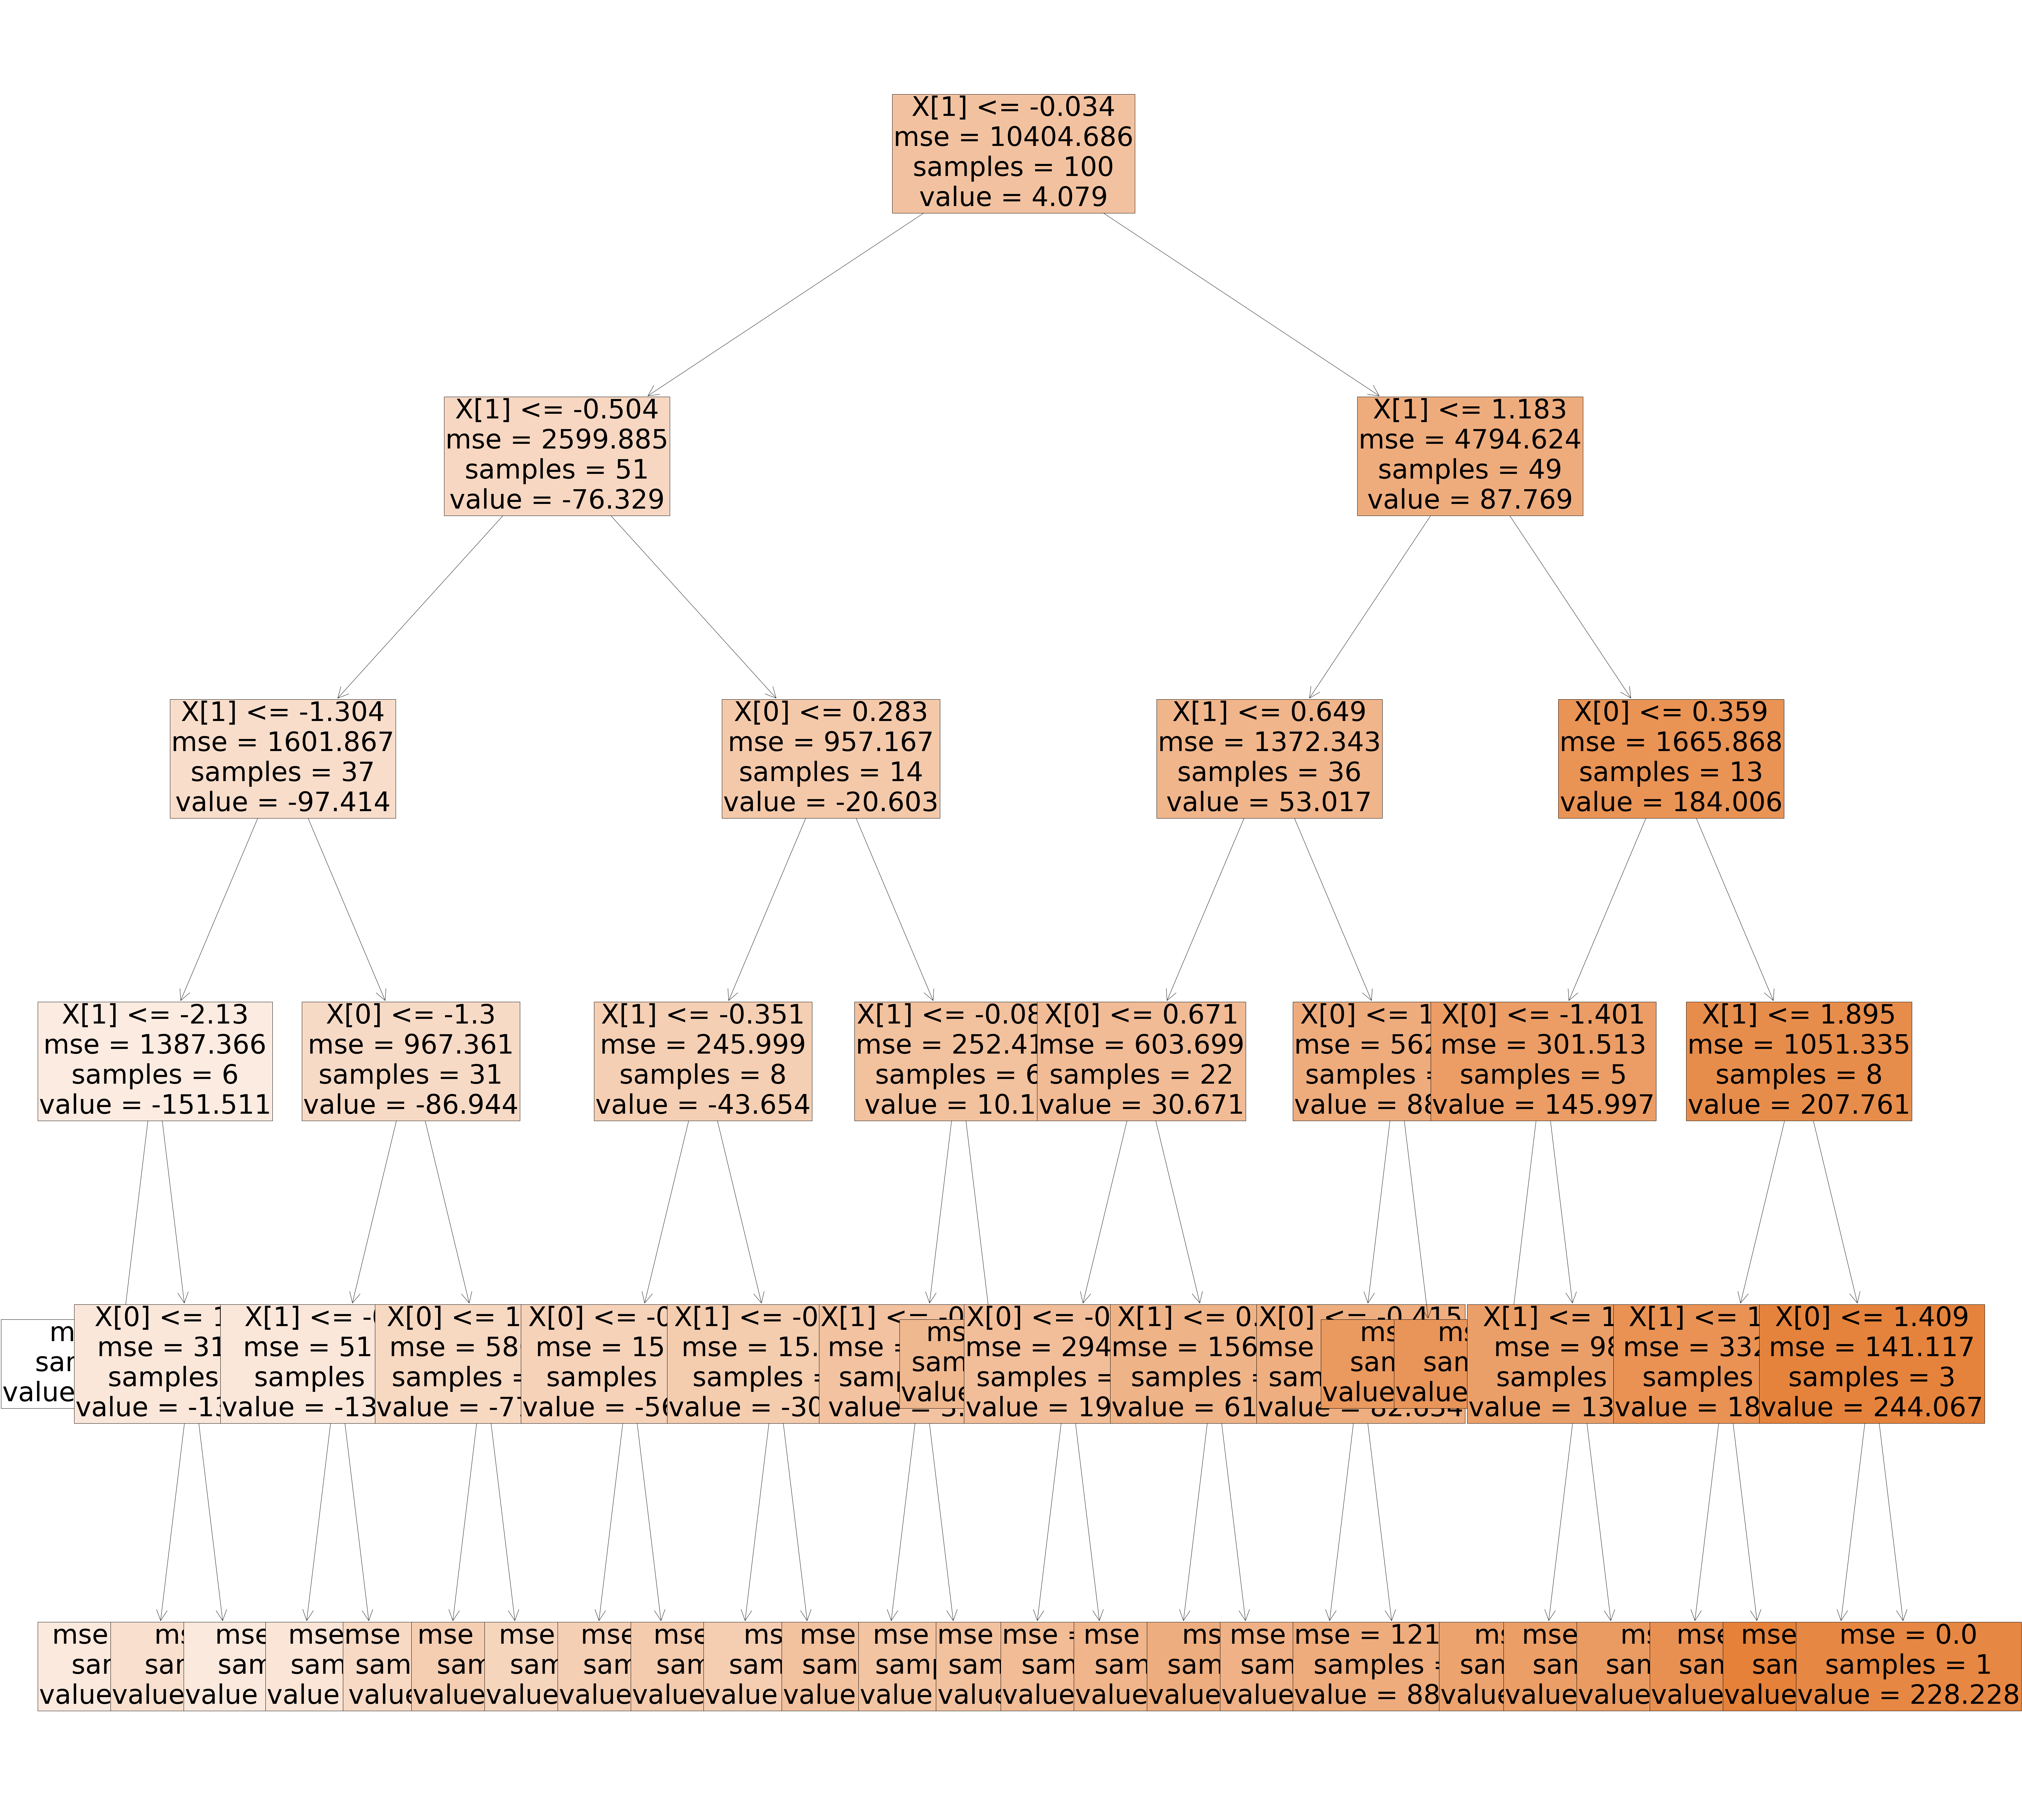

In [173]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(clf1, fontsize= 80, filled=True)

In order to be thourough I run a classifier Tree model to see if it improves the classficiation of of the data. 

In [174]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(Xt, yt)

[Text(181.35000000000002, 206.56799999999998, 'X[0] <= 16894.0\ngini = 0.462\nsamples = 2494\nvalue = [1589, 905]'),
 Text(153.45000000000002, 184.824, 'gini = 0.0\nsamples = 1242\nvalue = [1242, 0]'),
 Text(209.25000000000003, 184.824, 'X[0] <= 40100.0\ngini = 0.401\nsamples = 1252\nvalue = [347, 905]'),
 Text(181.35000000000002, 163.07999999999998, 'X[3] <= 2015.5\ngini = 0.304\nsamples = 1113\nvalue = [208, 905]'),
 Text(153.45000000000002, 141.336, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(209.25000000000003, 141.336, 'X[3] <= 2019.5\ngini = 0.151\nsamples = 986\nvalue = [81, 905]'),
 Text(181.35000000000002, 119.592, 'X[1] <= 4.5\ngini = 0.105\nsamples = 958\nvalue = [53, 905]'),
 Text(153.45000000000002, 97.848, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(209.25000000000003, 97.848, 'X[1] <= 8.5\ngini = 0.06\nsamples = 934\nvalue = [29, 905]'),
 Text(139.5, 76.10399999999998, 'X[2] <= 19.5\ngini = 0.021\nsamples = 867\nvalue = [9, 858]'),
 Text(83.7, 54.360000

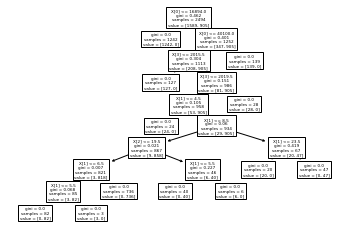

In [175]:
tree.plot_tree(clf2) 

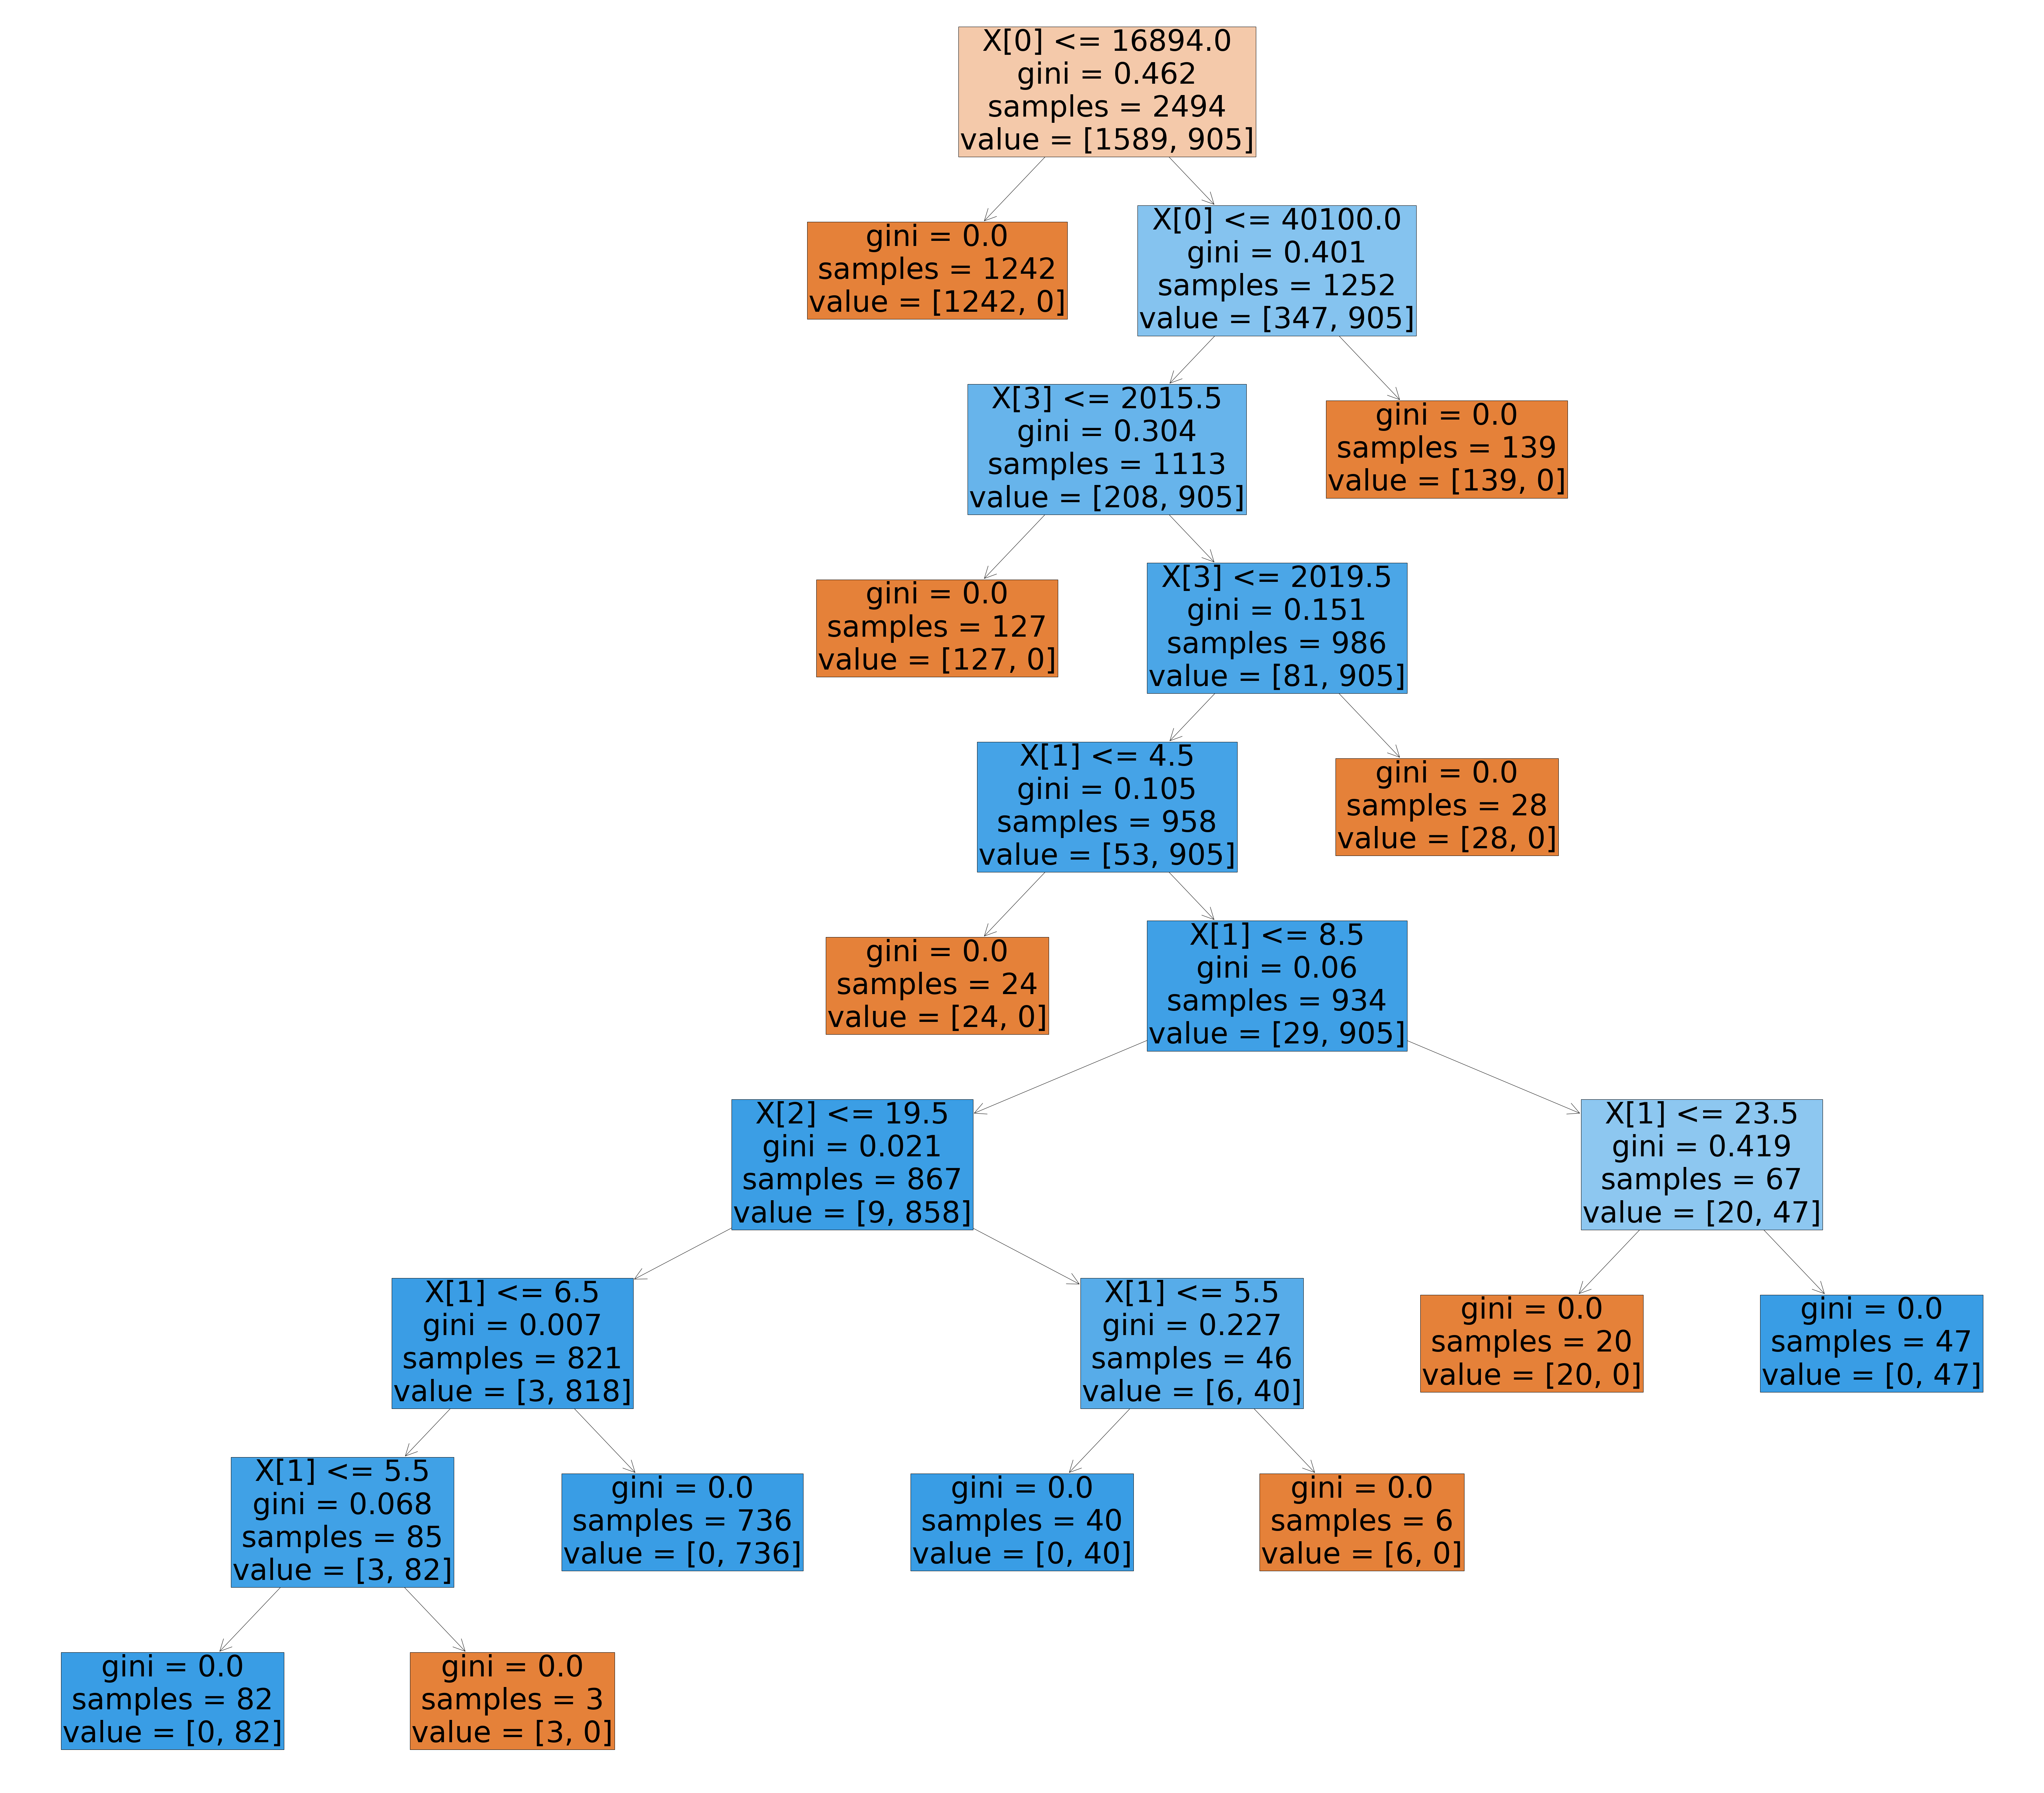

In [177]:
fig = plt.figure(figsize=(100,90))
_ = tree.plot_tree(clf2, fontsize= 80, filled=True)

I procede to save the tree to my computer.

In [178]:
fig.savefig("capstone_tree.png")

### Predict preference in the top 2 states with the most sales. 
#### Florida

In [41]:
df_tar = pd.read_excel('/Users/martinrivera/Desktop/IBM DS Certificate/Assignments/Capstone_Car_Dataset_Target.xlsx')
df_tar.head()

price      brand    model  year  mileage   color       state NewUsed  \
0   6300     toyota      SUV  2008   274117   black  new jersey    Used   
1   2899       ford    sedan  2011   190552  silver   tennessee    Used   
2   5350      dodge      mpv  2018    39590  silver     georgia    Used   
3  25000       ford    sedan  2014    64146    blue    virginia    Used   
4  27700  chevrolet  vintage  2018     6654     red     florida    Used   

   Target  
0       0  
1       0  
2       0  
3       0  
4       1

In [42]:
le = LabelEncoder()
df_tar["brand"] = le.fit_transform(df_tar["brand"]).astype(int)
df_tar["model"] = le.fit_transform(df_tar["model"]).astype(int)
df_tar["color"] = le.fit_transform(df_tar["color"]).astype(int)
#df_tar["state"] = le.fit_transform(df_tar["state"]).astype(int)
df_tar["NewUsed"] = le.fit_transform(df_tar["NewUsed"]).astype(int)
df_tar["Target"] = le.fit_transform(df_tar["Target"]).astype(int)

In [43]:
X = np.asarray(df_tar[['price', 'brand', 'model', 'year', 'mileage', 'color', 'state', 'NewUsed']])
y = np.asarray(df_tar['Target'])

In [44]:
df_florida= df_tar[(df_tar.state== 'florida')]
df_florida.head()

price  brand  model  year  mileage  color    state  NewUsed  Target
4   27700      5     20  2018     6654     34  florida        1       1
8   14600      5     16  2018     9371     39  florida        1       0
56  18100      3     16  2017    46766     39  florida        1       0
61  17800      5     16  2017    52435      2  florida        1       1
66  18600      5     16  2017    35200     46  florida        1       1

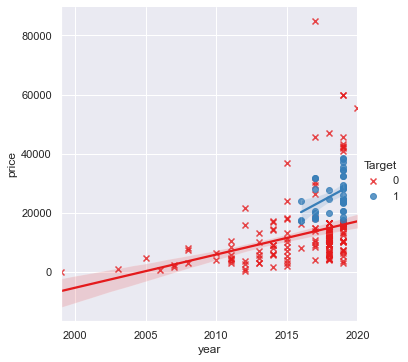

In [347]:
sns.lmplot(x="year", y="price", hue="Target", data=df_florida,
           markers=["x", "o"], palette="Set1");

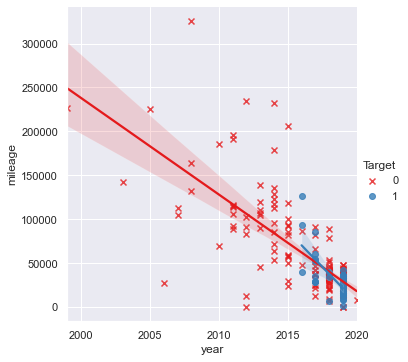

In [348]:
sns.lmplot(x="year", y="mileage", hue="Target", data=df_florida,
           markers=["x", "o"], palette="Set1");

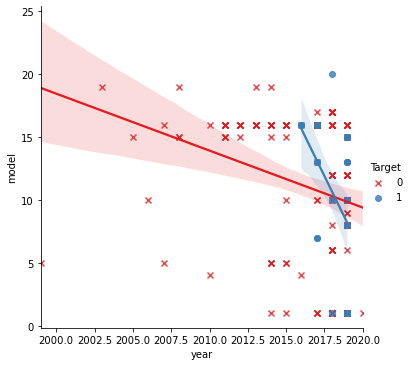

In [45]:
sns.lmplot(x="year", y="model", hue="Target", data=df_florida,
           markers=["x", "o"], palette="Set1");

#### California

In [20]:
df_tar = pd.read_excel('/Users/martinrivera/Desktop/IBM DS Certificate/Assignments/Capstone_Car_Dataset_Target.xlsx')

le = LabelEncoder()
df_tar["brand"] = le.fit_transform(df_tar["brand"]).astype(int)
df_tar["model"] = le.fit_transform(df_tar["model"]).astype(int)
df_tar["color"] = le.fit_transform(df_tar["color"]).astype(int)
#df_tar["state"] = le.fit_transform(df_tar["state"]).astype(int)
df_tar["NewUsed"] = le.fit_transform(df_tar["NewUsed"]).astype(int)
df_tar["Target"] = le.fit_transform(df_tar["Target"]).astype(int)

df_california= df_tar[(df_tar.state== 'california')]
df_california.head()

price  brand  model  year  mileage  color       state  NewUsed  Target
7   13350      9      5  2017    23525     15  california        1       0
11  12920      9     12  2017    39650     46  california        1       0
15  12710      9      5  2017    25747     46  california        1       0
20  12520      9      5  2017    30114     46  california        1       0
25  11900      9      5  2017    28040     39  california        1       0

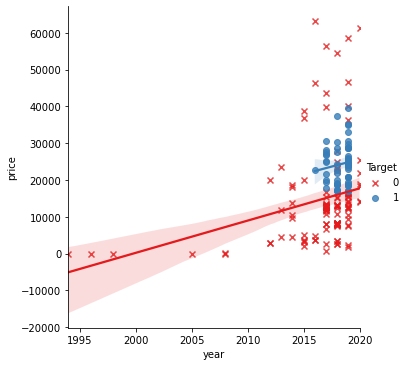

In [21]:
sns.lmplot(x="year", y="price", hue="Target", data=df_california,
           markers=["x", "o"], palette="Set1");

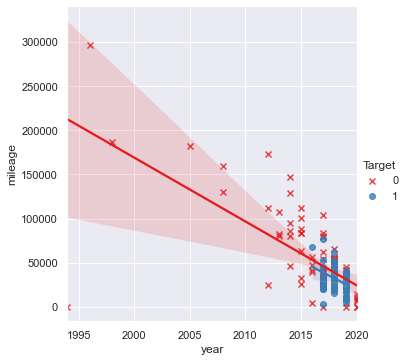

In [382]:
sns.lmplot(x="year", y="mileage", hue="Target", data=df_california,
           markers=["x", "o"], palette="Set1");

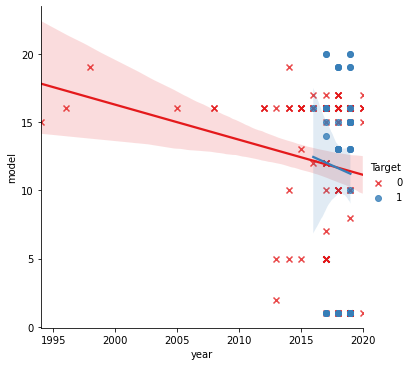

In [22]:
sns.lmplot(x="year", y="model", hue="Target", data=df_california,
           markers=["x", "o"], palette="Set1");